Initial Weights for AND:  [2 2 3]


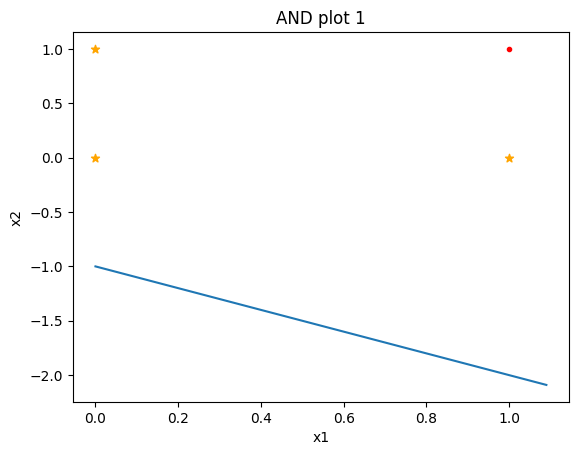

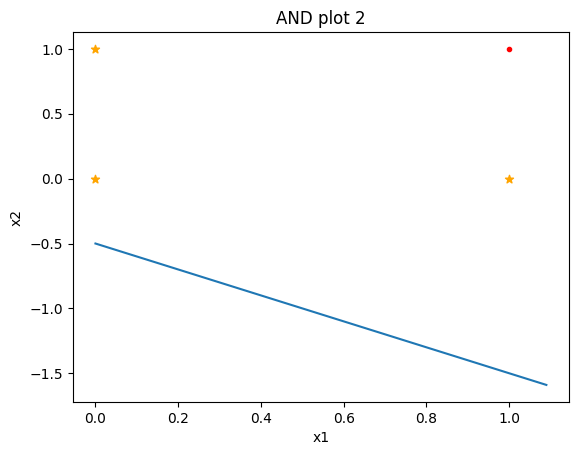

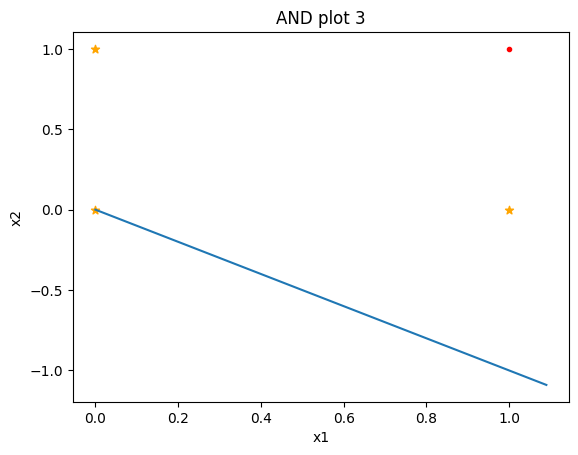

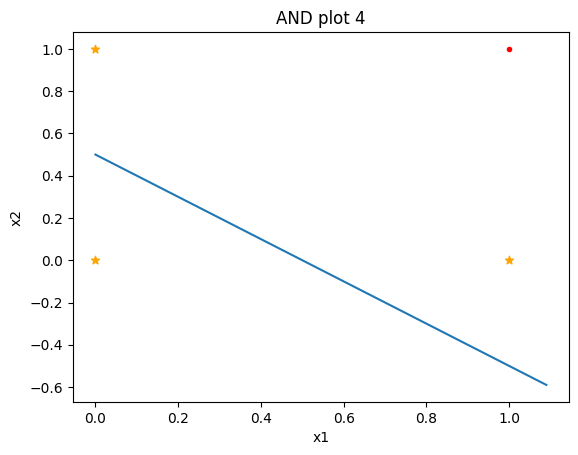

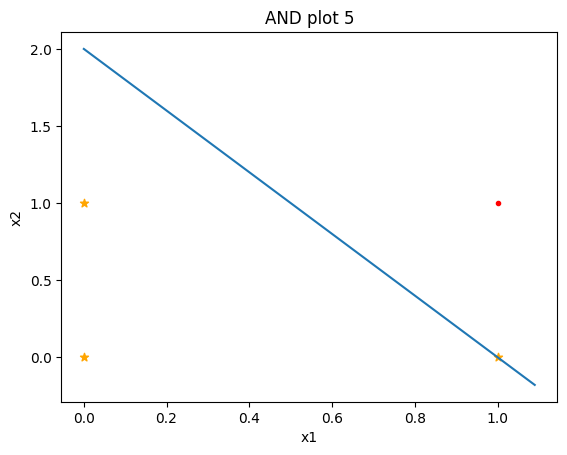

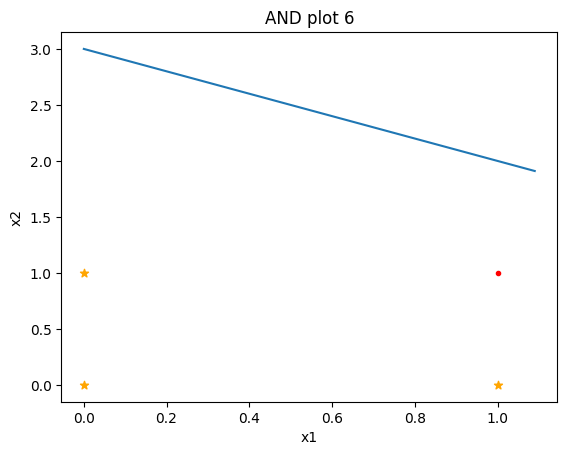

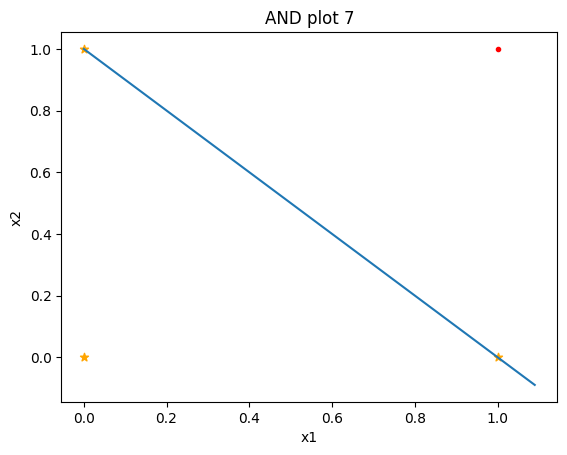

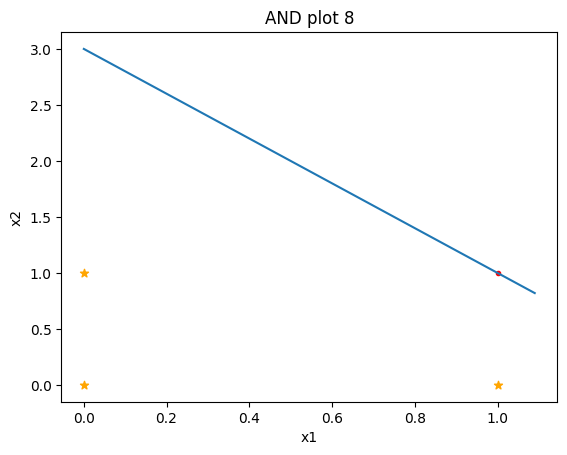

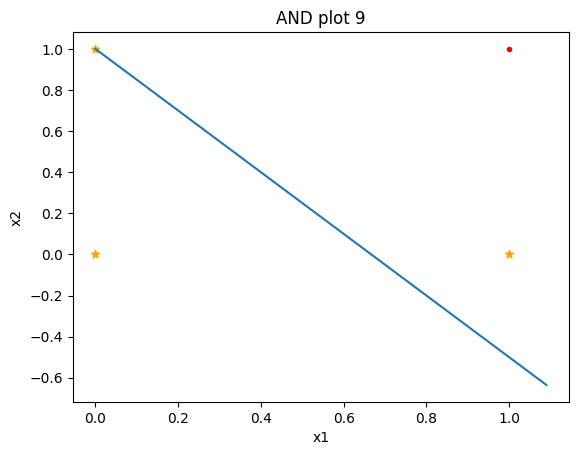

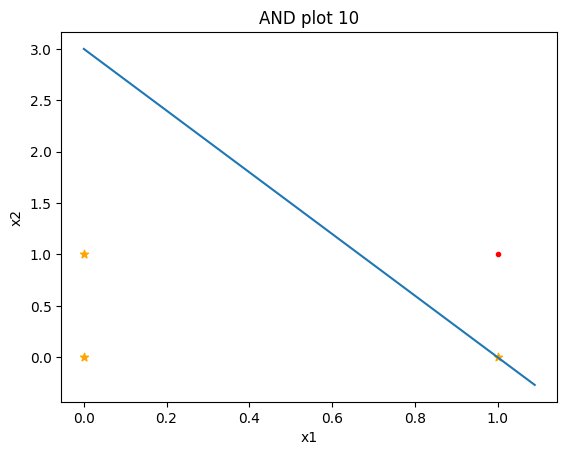

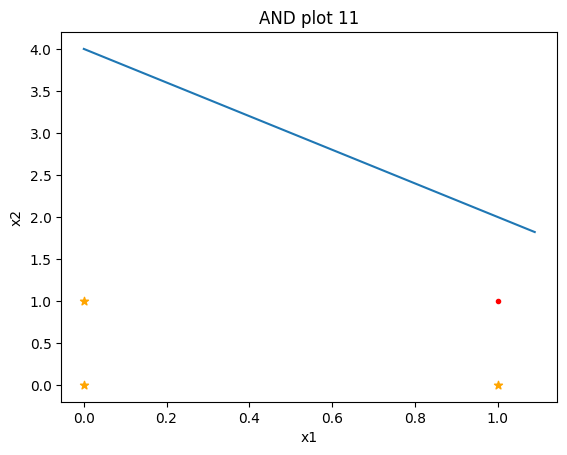

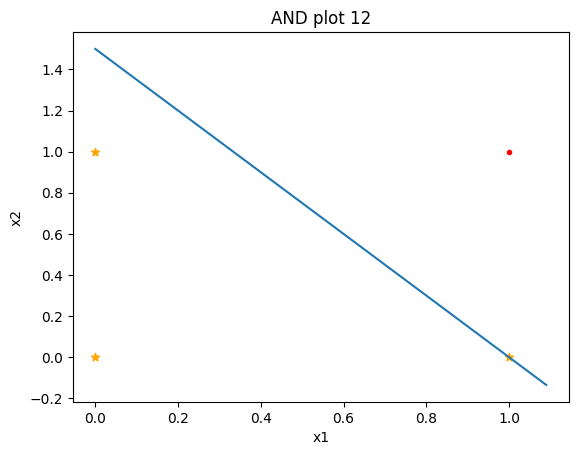

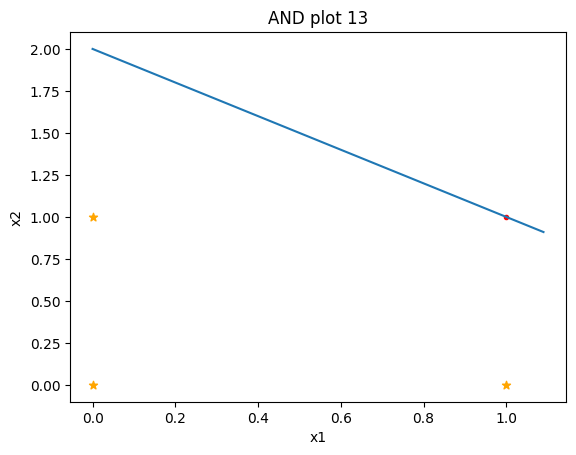

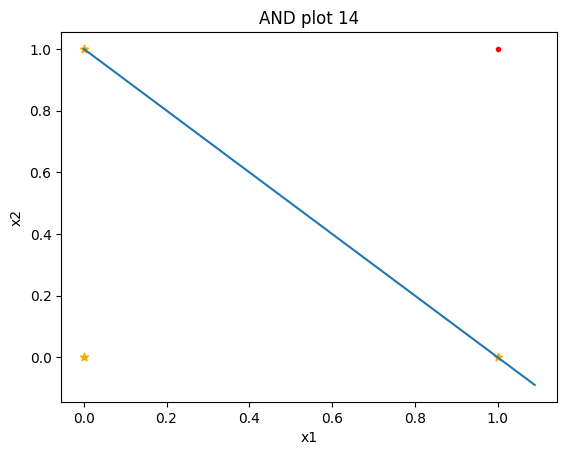

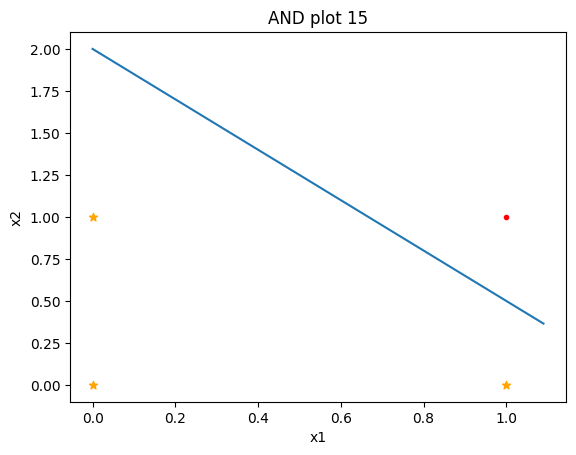

The number of updates required for AND is 15
The Decision boundary for AND is : 3x1 + 2x2 + -4 = 0
Final Weights for AND:  [ 3  2 -4]
Initial Weights for OR:  [2 2 3]


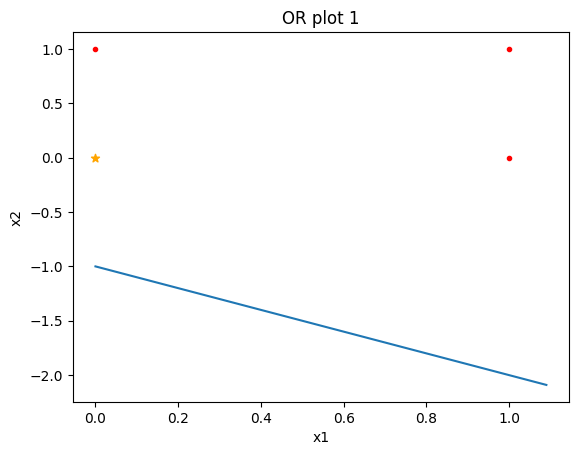

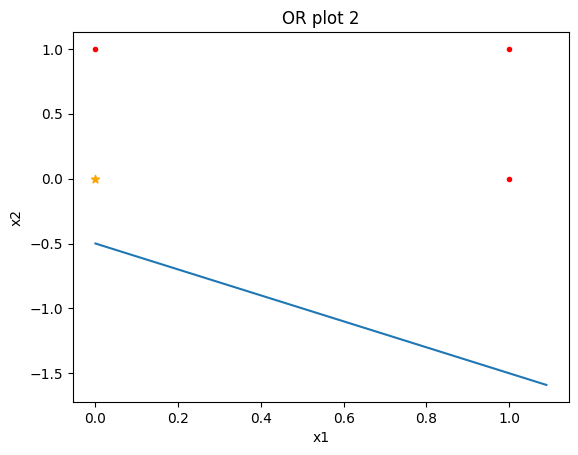

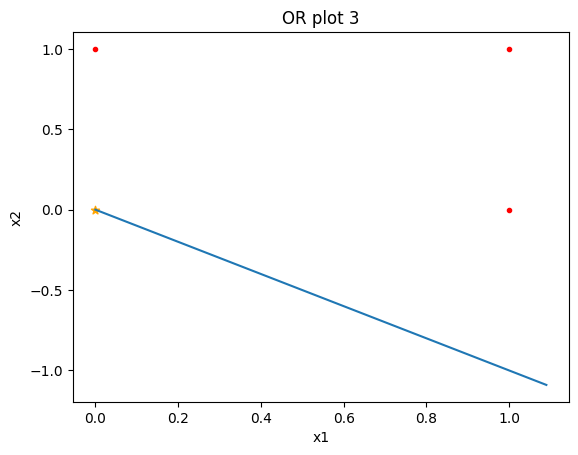

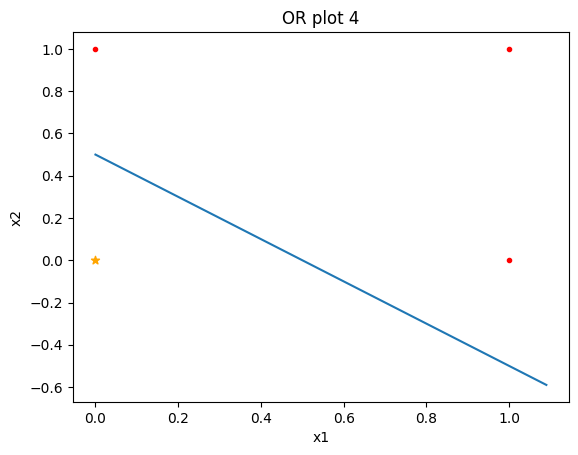

The number of updates required for OR is 4
The Decision boundary for OR is : 2x1 + 2x2 + -1 = 0
Final Weights for OR:  [ 2  2 -1]
Initial Weights for NOT:  [1 1]


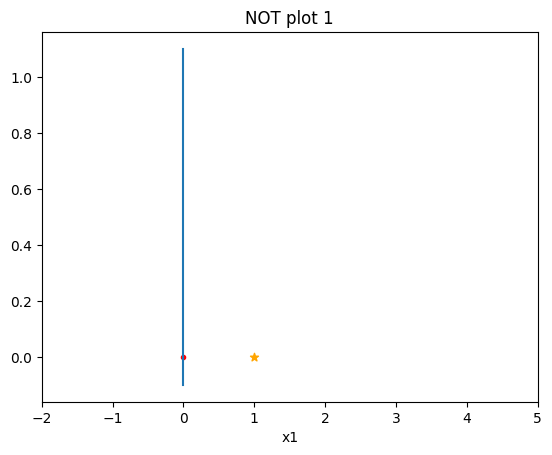

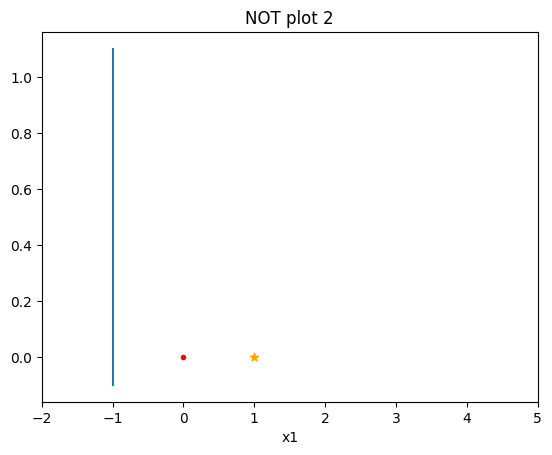

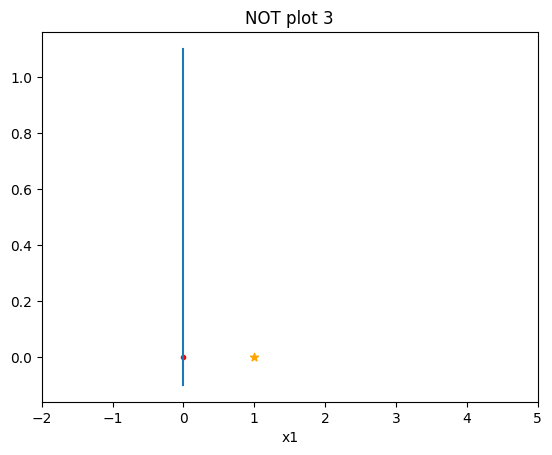

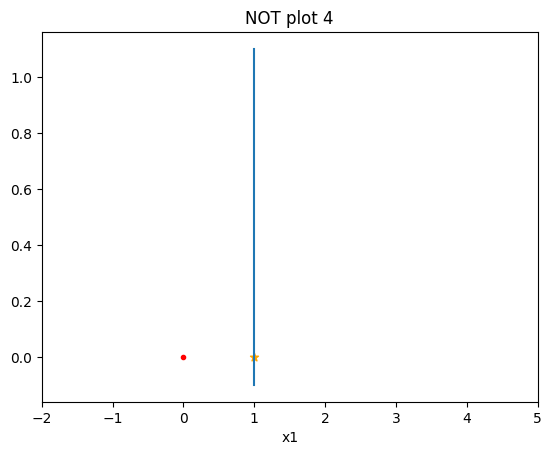

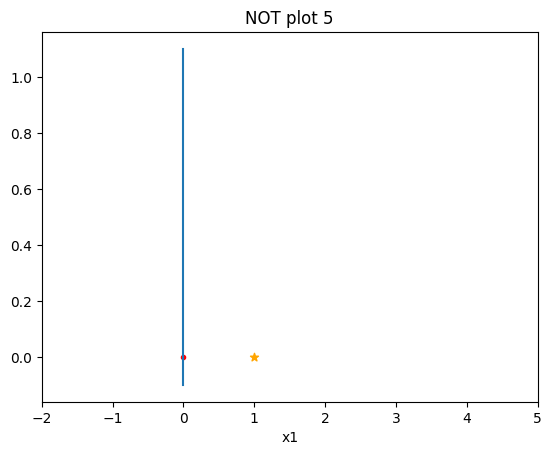

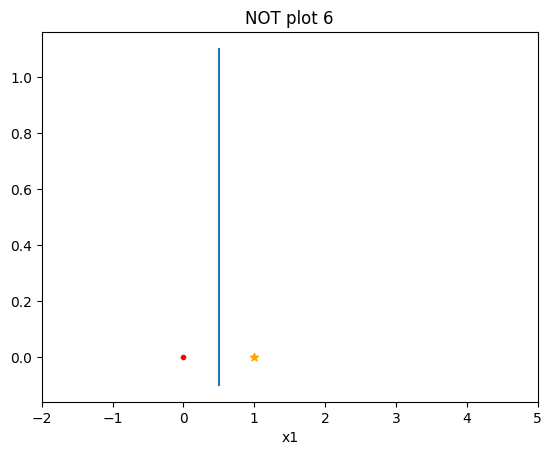

The number of updates required for NOT is 6
The Decision boundary for NOT is : -2x1 + 1 = 0
Final Weights for NOT:  [-2  1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

def update_weight(weights, deltax):
    return weights+deltax



def getScatterPlot(input_X, input_Y):
    scatter_x_1 = []
    scatter_x_2 = []
    scatter_y_1 = []
    scatter_y_2 = []
    for i in range(len(input_Y)):
        if(input_Y[i] == 1):
            scatter_x_1.append(input_X[i][0])
            scatter_y_1.append(input_X[i][1])
        else:
            scatter_x_2.append(input_X[i][0])
            scatter_y_2.append(input_X[i][1])

    plt.scatter(scatter_x_1, scatter_y_1, marker=".", c='red')
    plt.scatter(scatter_x_2, scatter_y_2, marker="*", c='orange')

def getScatterPlot_one(input_X, input_Y):
    scatter_x_1 = []
    scatter_x_2 = []
    scatter_y_1 = []
    scatter_y_2 = []
    for i in range(len(input_Y)):
        if(input_Y[i] == 1):
            scatter_x_1.append(input_X[i][0])
            scatter_y_1.append(0)
        else:
            scatter_x_2.append(input_X[i][0])
            scatter_y_2.append(0)

    plt.scatter(scatter_x_1, scatter_y_1, marker=".", c='red')
    plt.scatter(scatter_x_2, scatter_y_2, marker="*", c='orange')

def pta_one(train_X, train_Y, weights, name):
    print(f"Initial Weights for {name}: ", weights)
    weight_updates = 0
    while True:
        err = False

        for i in range(len(train_X)):
            myX = train_X[i]
            while True:
                z = np.dot(weights, myX)
                if(train_Y[i]*float(z)<=0):
                    err = True
                    weights = update_weight(weights, train_Y[i]*myX)
                    weight_updates += 1
                    y_axis = np.arange(-0.1, 1.1, 0.01)
                    if(weights[0] == 0):
                        x_axis = -((y_axis*0)+weights[1])/(weights[0]+1e-18)
                    else:
                        x_axis = -((y_axis*0)+weights[1])/(weights[0])
                    
                    getScatterPlot_one(train_X, train_Y)
                    plt.plot(x_axis, y_axis)
                    plt.xlim([-2, 5])
                    plt.title(f"{name} plot {weight_updates}")
                    plt.xlabel("x1")
                    plt.savefig(f"plots/{name} plot {weight_updates}.png")
                    plt.show()

                else:
                    break

            if err:
                break

        if not err:
            break

    print(f'The number of updates required for {name} is {weight_updates}')
    print(
        f'The Decision boundary for {name} is : {weights[0]}x1 + {weights[1]} = 0')
    print(f"Final Weights for {name}: ", weights)
    return weight_updates, weights


def pta_two(train_X, train_Y, weights, name):
    print(f"Initial Weights for {name}: ", weights)
    weight_updates = 0

    while True:
        err = False

        for i in range(len(train_X)):
            myX = train_X[i]
            while True:
                z = np.dot(weights, myX)
                
                
                if(train_Y[i]*float(z)<=0):
                    err = True
                    weights = update_weight(weights, train_Y[i]*myX)

                    weight_updates += 1
                    x_axis = np.arange(0, 1.1, 0.01)
                    y_axis = -((x_axis*weights[0])+weights[2])/(weights[1])

                    getScatterPlot(train_X, train_Y)
                    plt.plot(x_axis, y_axis)
                    
                    plt.title(f"{name} plot {weight_updates}")
                    plt.xlabel("x1")
                    plt.ylabel("x2")
                    plt.savefig(f"plots/{name} plot {weight_updates}.png")
                    plt.show()

                else:
                    break

            if err:
                break

        if not err:
            break

    print(f'The number of updates required for {name} is {weight_updates}')
    print(
        f'The Decision boundary for {name} is : {weights[0]}x1 + {weights[1]}x2 + {weights[2]} = 0')
    print(f"Final Weights for {name}: ", weights)

    return weight_updates, weights


def appendbias(train_X):
    for i in train_X:
        i.append(1)
    return train_X


AND_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
AND_Y = [-1, -1, -1, 1]
OR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
OR_Y = [-1, 1, 1, 1]
NOT_X = [[1], [0]]
NOT_Y = [-1, 1]
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
XOR_Y = [-1, 1, 1, -1]

AND_X = appendbias(AND_X)
OR_X = appendbias(OR_X)
NOT_X = appendbias(NOT_X)
XOR_X = appendbias(XOR_X)
weights = np.random.randint(0, 4, size=(3,))
weights_one = np.random.randint(0, 4, size=(2,))


AND_updates_req, AND_weights = pta_two(np.array(AND_X), np.array(
    AND_Y), np.array(weights), "AND")

OR_updates_req, OR_weights = pta_two(np.array(OR_X), np.array(
    OR_Y), np.array(weights), "OR")

NOT_updates_req, NOT_weights = pta_one(np.array(NOT_X), np.array(
    NOT_Y), np.array(weights_one), "NOT")


In [3]:
def pta_xor(train_X, train_Y, weights, name):
    
    print(f"Initial Weights for {name}: ", weights)
    weight_updates = 0
    weight_store={}
    steps=0
    while True:
        err = False
        stop=False
        for i in range(len(train_X)):
            
            print(f"For Training Sample : {train_X[i]}")
            print("Current Weights: ",weights)
            if i in weight_store and list(weights) in weight_store[i]:
                print(f"For Training Sample {train_X[i]}, we have encountered these weights {weights} before,which means that PTA will not be able to correctly classify all the samples.")
                print(f"It took {steps} steps for us to prove that PTA cannot compute XOR operation.")
                
                break
                
            
            if i in weight_store:
                weight_store[i].append(list(weights))
            else:
                weight_store[i]=[]
                weight_store[i].append(list(weights))
            myX = train_X[i]
               
            while True:
                z = np.dot(weights, myX)
                steps+=1
                if(train_Y[i]*float(z)<=0):
                    err = True
                    weights = update_weight(weights, train_Y[i]*myX)
                    weight_updates += 1
                   
                else:
                    break
            if err:
                break

        if not err:
            break

    
    return weight_updates, weights

In [4]:
pta_xor(np.array(XOR_X), np.array(XOR_Y), np.array(weights), "XOR")

Initial Weights for XOR:  [2 2 3]
For Training Sample : [0 0 1]
Current Weights:  [2 2 3]
For Training Sample : [0 0 1]
Current Weights:  [ 2  2 -1]
For Training Sample : [0 1 1]
Current Weights:  [ 2  2 -1]
For Training Sample : [1 0 1]
Current Weights:  [ 2  2 -1]
For Training Sample : [1 1 1]
Current Weights:  [ 2  2 -1]
For Training Sample : [0 0 1]
Current Weights:  [ 0  0 -3]
For Training Sample : [0 1 1]
Current Weights:  [ 0  0 -3]
For Training Sample : [0 0 1]
Current Weights:  [ 0  2 -1]
For Training Sample : [0 1 1]
Current Weights:  [ 0  2 -1]
For Training Sample : [1 0 1]
Current Weights:  [ 0  2 -1]
For Training Sample : [0 0 1]
Current Weights:  [1 2 0]
For Training Sample : [0 0 1]
Current Weights:  [ 1  2 -1]
For Training Sample : [0 1 1]
Current Weights:  [ 1  2 -1]
For Training Sample : [1 0 1]
Current Weights:  [ 1  2 -1]
For Training Sample : [0 0 1]
Current Weights:  [2 2 0]
For Training Sample : [0 0 1]
Current Weights:  [ 2  2 -1]
For Training Sample [0 0 1], we

(12, array([ 2,  2, -1]))